In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stats
%matplotlib inline

In [2]:
volatility_df = pd.read_csv('../../data/03_processed/volatility_gas_ASTM.csv')

In [3]:
volatility_df['DateSampled'] = pd.to_datetime(volatility_df.DateSampled).apply(lambda x: x.date())
volatility_df = volatility_df.set_index(volatility_df.DateSampled)
print(type(volatility_df.index[0]))
volatility_df.head()

<class 'datetime.date'>


,Unnamed: 0,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,...,TN_retailers_seasons,TN_distributor_seasons,vapor_liquid_minC_retail,distillation_50_minC _retail,distillation_50_maxC_retail,vapor_pressure_maxC_retail,vapor_liquid_minC_dist,distillation_50_minC_dist,distillation_50_maxC_dist,vapor_pressure_maxC_dist
DateSampled,,,,,,,,,,,,,,,,,,,,,
2015-11-23,0,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-23,1,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-23,2,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,3,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Distillation 50%,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,4,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Vapor Pressure,kPa,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0


In [4]:
volatility_df.columns

Index(['Unnamed: 0', 'Sample', 'Prod', 'DateSampled', 'Grade', 'Supplier',
       'FacilityName', 'SiteAddress', 'Test', 'Units', 'Method', 'Result',
       'MinResult', 'MaxResult', 'Compliance', 'datesampled_month',
       'datesampled_day', 'Date', 'TN_retailers_seasons',
       'TN_distributor_seasons', 'vapor_liquid_minC_retail',
       'distillation_50_minC _retail', 'distillation_50_maxC_retail',
       'vapor_pressure_maxC_retail', 'vapor_liquid_minC_dist',
       'distillation_50_minC_dist', 'distillation_50_maxC_dist',
       'vapor_pressure_maxC_dist'],
      dtype='object')

In [17]:
volatility_results_df = volatility_df[['Test','Result']]
volatility_results_df.head()

,Test,Result
DateSampled,,
2015-11-23,Distillation 50%,73.3
2015-11-23,Vapor Pressure,88.9
2015-11-23,Vapor-Liquid Ratio,44.6
2015-11-24,Distillation 50%,67.4
2015-11-24,Vapor Pressure,92.7


In [33]:
volatility_results_df['Result'] = volatility_results_df.Result.replace('  ', np.nan)

/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
volatility_results_df['temp'] = volatility_results_df.Result.astype('float')

/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
volatility_results_df.drop('Result', axis=1, inplace=True)
volatility_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62256 entries, 2015-11-23 to 2018-06-20
Data columns (total 2 columns):
Test    62256 non-null object
temp    62111 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


/Users/Kate/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
volatility_results_floats_df = volatility_results_df.dropna()
volatility_results_floats_df.head()

,Test,temp
DateSampled,,
2015-11-23,Distillation 50%,73.3
2015-11-23,Vapor Pressure,88.9
2015-11-23,Vapor-Liquid Ratio,44.6
2015-11-24,Distillation 50%,67.4
2015-11-24,Vapor Pressure,92.7


In [60]:
# Make data frames for each test to compare seasonality with temperature results of test
distillation_50_df = volatility_results_floats_df[volatility_results_floats_df.Test == 'Distillation 50%']
distillation_50_df.rename(columns={"temp": "Result_deg_C"}, inplace =True)
Distillation_50 = distillation_50_df.drop(columns=['Test'])

vapor_liquid_df = volatility_results_floats_df[volatility_results_floats_df.Test == 'Vapor-Liquid Ratio']
vapor_liquid_df.rename(columns={"temp": "Result_deg_C"}, inplace =True)
Vapor_Liquid = vapor_liquid_df.drop(columns=['Test'])

vapor_pressure_df = volatility_results_floats_df[volatility_results_floats_df.Test == 'Vapor Pressure']
vapor_pressure_df.rename(columns={"temp": "Result_deg_C"}, inplace =True)
Vapor_Pressure = vapor_pressure_df.drop(columns=['Test'])

/Users/Kate/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [69]:
Distillation_50.sort_values(by,  axis = 1)
Distillation_50.head(20)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [61]:
Vapor_Liquid.head()

,Result_deg_C
DateSampled,
2015-11-23,44.6
2015-11-24,43.0
2015-11-24,42.2
2015-11-24,51.1
2015-12-02,43.5


In [62]:
Vapor_Pressure.head()

,Result_deg_C
DateSampled,
2015-11-23,88.9
2015-11-24,92.7
2015-11-24,94.3
2015-11-24,91.4
2015-12-02,93.0


## do the stationary time check

/Users/Kate/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


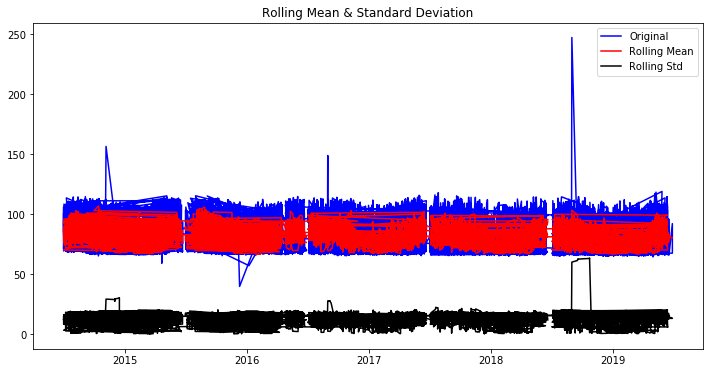

Results of Dickey-Fuller Test:
Test Statistic                -1.564083e+01
p-value                        1.641089e-28
#Lags Used                     2.500000e+01
Number of Observations Used    2.067700e+04
Critical Value (1%)           -3.430666e+00
Critical Value (5%)           -2.861680e+00
Critical Value (10%)          -2.566844e+00
dtype: float64


In [63]:
import pandas as pd
from pandas import Series
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

# Import the check_stationarity function from previous lab
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['Result_deg_C']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

# Import passengers.csv and set it as a time-series object. Plot the TS
#Distillation_50.plot(figsize=(10,4), color="blue");
stationarity_check(Distillation_50)

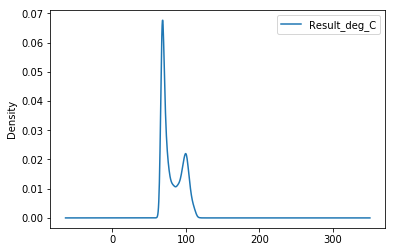

In [64]:
ax = Distillation_50.plot.kde()
plt.show()

In [22]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(distillation_50_df.Result_deg_C)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''